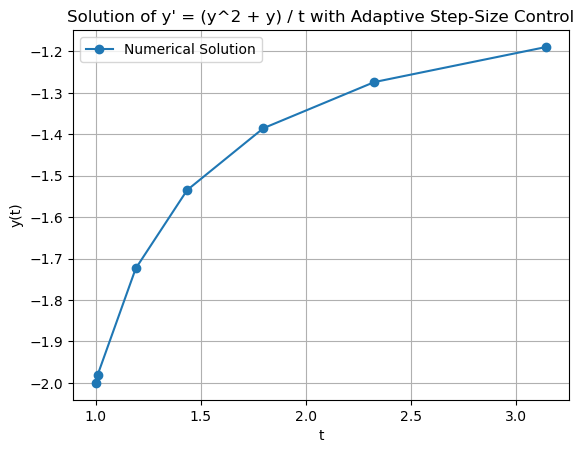

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the function representing the differential equation
def f(t, y):
    return (y**2 + y) / t


def runge_kutta_4th_order(t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

absolute_tolerance = 1e-4

t0 = 1
y0 = -2

# Initial step size
h = 0.01

# Arrays to store the solution and mesh points
t_values = [t0]
y_values = [y0]

# Adaptive step-size control
while t_values[-1] < 3:
    y_new_1 = runge_kutta_4th_order(t_values[-1], y_values[-1], h)
    y_new_2 = runge_kutta_4th_order(t_values[-1], y_values[-1], h/2)
    y_new_2 = runge_kutta_4th_order(t_values[-1] + h/2, y_new_2, h/2)

    error = np.abs(y_new_2 - y_new_1)

    if error < absolute_tolerance:
        t_values.append(t_values[-1] + h)
        y_values.append(y_new_1)
    
    # Updating the step size based on the error
    h = 0.9 * h * (absolute_tolerance / error)**0.25

t_values = np.array(t_values)
y_values = np.array(y_values)

plt.plot(t_values, y_values, label='Numerical Solution', marker='o')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of y\' = (y^2 + y) / t with Adaptive Step-Size Control')
plt.grid(True)
plt.legend()
plt.show()
